In [1]:
!git clone https://github.com/hungvotranchi/ComputerVision.git

Cloning into 'ComputerVision'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 49 (delta 8), reused 45 (delta 7), pack-reused 0
Unpacking objects: 100% (49/49), 4.18 MiB | 8.30 MiB/s, done.


In [2]:
import os
os.chdir("ComputerVision/ImageClassification")
!sh scripts/download.sh
os.chdir("model")

--2024-03-09 10:47:42--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: 'cifar-10-python.tar.gz'

cifar-10-python.tar 100%[===================>] 162.60M  21.4MB/s    in 8.2s    

2024-03-09 10:47:51 (19.8 MB/s) - 'cifar-10-python.tar.gz' saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [3]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn


import sys
sys.path.append("..")
from src.load_data import load_CIFAR10
from src.preprocess import transform_VGGModel
from src.plotting import imshow
from model.VGG import VGG16
from src.train_predict import train, test_classification

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
batch_size = 128

train_set, test_set = load_CIFAR10(transform_VGGModel())
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 2)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 2)

In [6]:
classes = train_set.classes

Training

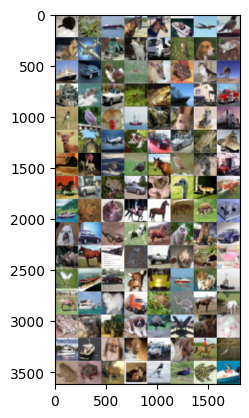

<generator object <genexpr> at 0x7c77c96a7d10>


In [7]:
dataiter = iter(train_dataloader)
img, labels = next(dataiter)

imshow(torchvision.utils.make_grid(img))
print(" ".join(f'{classes[labels[j]]}') for j in range(batch_size))


In [8]:
img.shape

torch.Size([128, 3, 224, 224])

In [9]:
model = VGG16(num_class= len(classes))

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [10]:
train(num_loops= 20, criterion= criterion, optim= optimizer, model= model, \
      train_dataloader= train_dataloader, device= device, path = "VGG16_cifar10.pth")

Finished Training


Testing

In [13]:
model_pred = VGG16(num_class= len(classes))
model_pred.load_state_dict(torch.load("VGG16_cifar10.pth"))

<All keys matched successfully>

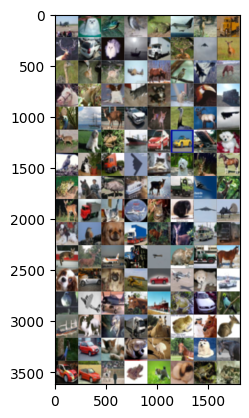

Ground truth:  airplane dog bird bird frog airplane deer truck deer automobile cat ship truck deer airplane deer bird cat deer airplane deer bird airplane horse horse frog dog cat dog dog bird truck bird ship deer automobile dog bird deer airplane deer dog frog ship automobile automobile truck dog bird cat truck airplane cat dog deer horse frog horse bird ship deer truck airplane deer deer truck cat airplane cat bird airplane airplane dog bird dog truck deer deer truck truck cat deer airplane truck airplane cat truck horse dog automobile dog airplane automobile airplane dog ship bird airplane airplane horse ship frog automobile bird ship dog dog truck horse frog horse deer bird automobile cat frog bird horse dog horse automobile automobile horse frog cat dog frog frog
Predict:  truck deer cat truck ship bird automobile ship deer truck ship automobile ship frog ship cat automobile deer deer ship cat cat deer cat ship cat frog truck frog bird deer cat automobile dog deer dog deer frog fr

In [14]:
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [15]:
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)

Accuracy of the network in the test dataset: 10 %
Accuracy for class airplane: 2.7
Accuracy for class automobile: 12.1
Accuracy for class bird: 3.1
Accuracy for class cat: 16.0
Accuracy for class deer: 15.7
Accuracy for class dog: 5.5
Accuracy for class frog: 13.8
Accuracy for class horse: 0.8
Accuracy for class ship: 13.3
Accuracy for class truck: 17.3


Loading from pretrained

In [10]:
from torchvision.models import vgg16,VGG16_Weights

models_pretrained = vgg16(pretrained = True)

    
models_pretrained.classifier[6].out_features = len(classes)  # Get the number of input features of the first layer

# Check the modified model architecture
print(models_pretrained)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(models_pretrained.parameters(), lr=0.001, momentum=0.9)

models_pretrained.to(device)

train(num_loops= 10, criterion= criterion, optim= optimizer, model= models_pretrained, \
      train_dataloader= train_dataloader, device= device, path = "VGG16Pretrained_cifar10.pth")

[1,   200] loss: 0.186
[2,   200] loss: 0.062
[3,   200] loss: 0.042
[4,   200] loss: 0.031
[5,   200] loss: 0.024
[6,   200] loss: 0.019
[7,   200] loss: 0.014
[8,   200] loss: 0.011
[9,   200] loss: 0.009
[10,   200] loss: 0.007
Finished Training


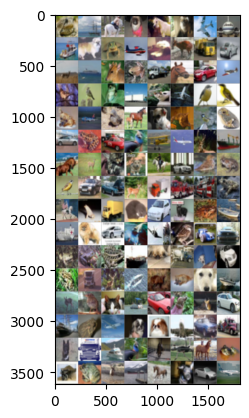

Ground truth:  frog ship horse dog horse cat airplane airplane ship dog frog airplane dog deer truck automobile deer ship deer frog truck horse automobile airplane bird bird frog truck cat airplane bird bird dog airplane bird horse dog cat bird frog automobile frog automobile bird airplane airplane deer ship horse deer cat dog horse automobile bird frog bird automobile automobile deer truck truck truck frog horse frog truck cat automobile cat frog ship ship dog automobile bird airplane bird automobile automobile frog frog frog ship dog truck dog automobile frog truck deer ship deer dog dog ship deer bird cat ship automobile frog deer automobile ship frog airplane dog dog airplane automobile truck dog truck ship bird horse bird horse frog truck frog deer ship horse dog automobile airplane
Predict:  frog ship horse dog horse cat airplane ship ship dog frog airplane cat deer truck automobile deer ship deer frog truck horse automobile airplane bird bird frog truck bird bird bird bird dog a

In [12]:
model_pred = models_pretrained
model_pred.load_state_dict(torch.load("VGG16Pretrained_cifar10.pth"))
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
model_pred.to('cpu')
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [13]:
model_pred.to(device)
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)

Accuracy of the network in the test dataset: 90 %
Accuracy for class airplane: 91.6
Accuracy for class automobile: 96.4
Accuracy for class bird: 91.5
Accuracy for class cat: 79.9
Accuracy for class deer: 88.7
Accuracy for class dog: 84.1
Accuracy for class frog: 97.2
Accuracy for class horse: 87.0
Accuracy for class ship: 92.0
Accuracy for class truck: 92.7
